In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns


In [4]:
from sklearn.datasets import make_classification

In [13]:
##create the dataset
X,y=make_classification(n_samples=100,n_classes=2,random_state=42)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)


In [15]:
##model training
from sklearn.linear_model import LogisticRegression 
logistic=LogisticRegression()



In [16]:
logistic.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [18]:
y_pred=logistic.predict(X_test)
print(y_pred)

[0 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1]


In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [22]:

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
score=accuracy_score(y_test,y_pred)
print(score)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

1.0
[[15  0]
 [ 0 15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



hyperparameter tuning and cross validation


In [47]:
model=LogisticRegression()
penalty = ['l1', 'l2']
c_values = [100, 10, 1.0, 0.01]
solver = ['liblinear', 'saga']

In [48]:
params=dict(penalty=penalty,C=c_values,solver=solver)

In [49]:
##Grid search CV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold()
grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1)

In [50]:
print(grid)



GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.01], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')


In [51]:
grid.fit(X_train,y_train)

,estimator,LogisticRegression()
,param_grid,"{'C': [100, 10, ...], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo...shuffle=False)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [52]:
print(grid.best_params_)


{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [53]:
grid.best_score_

np.float64(0.9714285714285715)

In [54]:
y_pred=grid.predict(X_test)

In [55]:
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[15  0]
 [ 0 15]]


In [58]:
##randomized Search CV
from sklearn.model_selection import RandomizedSearchCV
model=LogisticRegression()
randomcv=RandomizedSearchCV(estimator=model,param_distributions=params,scoring='accuracy',cv=5,n_jobs=-1)


In [59]:
print(randomcv)


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [100, 10, 1.0, 0.01],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga']},
                   scoring='accuracy')


In [60]:
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[15  0]
 [ 0 15]]


In [63]:
##Logistic regression for multiclass classificatio problem

SyntaxError: invalid syntax (1038515349.py, line 1)

In [69]:
##create the dataset
X,y=make_classification(n_samples=1000,n_features=10,n_informative=3,n_classes=3,random_state=15)

In [70]:
X


array([[-1.28613186, -0.64833414,  1.04411477, ..., -1.3164116 ,
         1.01191003, -0.89806282],
       [-0.22222406,  2.083232  ,  1.19111402, ...,  0.98140271,
        -1.62879759,  1.37759419],
       [-0.43196264,  0.37574543, -1.37033375, ...,  1.2926021 ,
         0.925545  ,  0.23270542],
       ...,
       [-0.16384636, -0.41072503,  0.73908587, ...,  0.55830515,
         1.08971786, -0.26627295],
       [ 1.74969059, -1.12416838,  0.19980683, ...,  0.75255654,
         0.32229436, -0.17334302],
       [-0.24755583, -1.1705942 , -1.14058569, ...,  0.2063625 ,
         1.84351802, -0.81483138]], shape=(1000, 10))

In [71]:
y

array([2, 0, 0, 0, 1, 0, 1, 0, 2, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 2,
       2, 1, 1, 0, 2, 0, 2, 1, 2, 1, 2, 2, 0, 1, 2, 1, 1, 2, 1, 1, 2, 2,
       0, 2, 1, 0, 2, 0, 0, 1, 0, 1, 1, 0, 2, 2, 0, 1, 1, 2, 0, 0, 1, 0,
       0, 1, 2, 2, 0, 1, 2, 2, 1, 2, 0, 2, 0, 0, 1, 0, 2, 0, 2, 0, 0, 2,
       1, 2, 0, 0, 2, 0, 1, 0, 2, 0, 2, 1, 0, 0, 2, 2, 0, 2, 2, 0, 1, 0,
       1, 0, 1, 2, 1, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 1, 1, 2, 2, 1, 2,
       0, 1, 2, 2, 0, 2, 2, 0, 0, 1, 0, 2, 0, 1, 2, 0, 2, 1, 1, 0, 2, 1,
       0, 2, 2, 2, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 2, 1, 2, 2, 2, 2, 0, 1, 0, 1, 0, 2, 2, 2, 1, 1, 0, 0, 0, 2, 0,
       0, 0, 1, 0, 2, 1, 0, 2, 2, 1, 1, 1, 1, 2, 0, 1, 2, 2, 1, 1, 0, 2,
       2, 1, 0, 2, 2, 1, 0, 1, 2, 0, 2, 1, 0, 0, 1, 2, 0, 0, 0, 0, 2, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 2, 2, 1, 0, 1, 1, 2, 2, 2, 2, 0, 1, 0,
       0, 2, 2, 1, 2, 0, 0, 1, 1, 2, 2, 1, 0, 0, 1, 0, 1, 2, 1, 0, 1, 0,
       2, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 2, 2, 2,

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)



In [77]:
##model training
from sklearn.linear_model import LogisticRegression 
logistic=LogisticRegression(multi_class='ovr')
logistic.fit(X_train,y_train)
y_pred=logistic.predict(X_test)




C:\Users\sakshi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [78]:
y_pred

array([2, 1, 2, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1,
       1, 1, 1, 0, 0, 0, 2, 1, 0, 2, 2, 1, 2, 0, 0, 2, 2, 1, 2, 2, 2, 1,
       2, 0, 1, 2, 0, 1, 0, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       2, 1, 0, 1, 0, 1, 2, 1, 2, 2, 1, 0, 1, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       2, 1, 1, 2, 2, 0, 0, 0, 2, 2, 0, 1, 2, 1, 2, 1, 0, 2, 0, 2, 0, 1,
       2, 1, 2, 2, 1, 1, 1, 1, 2, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 1, 2, 0,
       2, 2, 0, 0, 0, 2, 0, 2, 0, 1, 2, 1, 1, 2, 0, 0, 1, 1, 2, 2, 2, 1,
       2, 0, 2, 2, 2, 1, 0, 2, 0, 0, 2, 0, 2, 0, 0, 1, 2, 0, 1, 1, 1, 1,
       0, 2, 1, 0, 0, 1, 2, 2, 2, 2, 2, 0, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1,
       0, 0, 1, 2, 2, 0, 0, 2, 1, 2, 1, 0, 0, 2, 1, 1, 1, 2, 2, 1, 2, 1,
       0, 1, 0, 0, 1, 0, 2, 1, 0, 2, 2, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 1, 2, 2, 2, 1, 0, 0, 1, 0, 2,
       1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 0, 0, 0, 1, 0, 2, 2, 0, 2, 0,
       0, 0, 1, 1, 2, 0, 1, 2, 2, 0, 1, 2, 0, 2])

In [79]:
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.79
              precision    recall  f1-score   support

           0       0.82      0.87      0.84        97
           1       0.73      0.81      0.77        91
           2       0.82      0.71      0.76       112

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.79      0.79      0.79       300

[[84  3 10]
 [10 74  7]
 [ 8 25 79]]


In [80]:
##LOGISTIC REGRESSION FOR IMBALANCED DATASET


SyntaxError: invalid syntax (2392862336.py, line 1)

In [84]:
from collections import Counter
from sklearn.datasets import make_classification

In [86]:
##create the dataset
X,y=make_classification(n_samples=1000,n_features=2,n_clusters_per_class=1,n_redundant=0,
                        weights=[0.99],random_state=10)

In [87]:
X

array([[ 1.45122049, -1.08670474],
       [ 2.08029047, -0.97808443],
       [ 1.91805213, -1.0431487 ],
       ...,
       [ 0.83675119, -0.54161851],
       [ 0.45782986, -1.05177133],
       [ 0.27891721, -1.16309231]], shape=(1000, 2))

In [88]:
Counter(y)

Counter({np.int64(0): 985, np.int64(1): 15})

In [89]:
import seaborn as sns


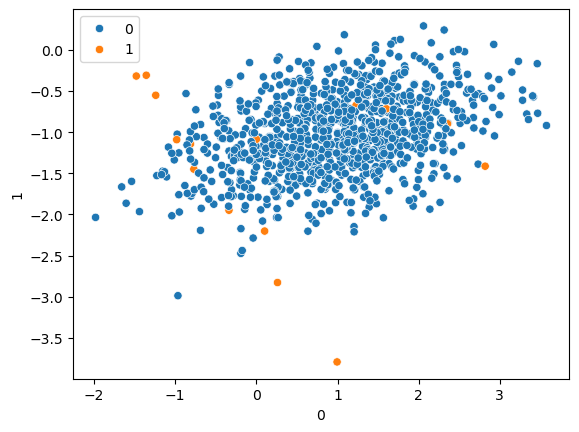

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(X)

sns.scatterplot(x=df[0], y=df[1], hue=y)

plt.show()


In [114]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)



In [115]:
from sklearn.linear_model import LogisticRegression 
model=LogisticRegression()
penalty = ['l1', 'l2']
c_values = [100, 10, 1.0, 0.01]
solver = ['liblinear', 'saga']
class_weight=[{0:w,1:y} for w in [1,10,50,100] for y in[1,10,50,100]]

In [116]:
params=dict(penalty=penalty,C=c_values,solver=solver,class_weight=class_weight)

In [117]:
class_weight

[{0: 1, 1: 1},
 {0: 1, 1: 10},
 {0: 1, 1: 50},
 {0: 1, 1: 100},
 {0: 10, 1: 1},
 {0: 10, 1: 10},
 {0: 10, 1: 50},
 {0: 10, 1: 100},
 {0: 50, 1: 1},
 {0: 50, 1: 10},
 {0: 50, 1: 50},
 {0: 50, 1: 100},
 {0: 100, 1: 1},
 {0: 100, 1: 10},
 {0: 100, 1: 50},
 {0: 100, 1: 100}]

In [118]:
print(params)






{'penalty': ['l1', 'l2'], 'C': [100, 10, 1.0, 0.01], 'solver': ['liblinear', 'saga'], 'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10}, {0: 1, 1: 50}, {0: 1, 1: 100}, {0: 10, 1: 1}, {0: 10, 1: 10}, {0: 10, 1: 50}, {0: 10, 1: 100}, {0: 50, 1: 1}, {0: 50, 1: 10}, {0: 50, 1: 50}, {0: 50, 1: 100}, {0: 100, 1: 1}, {0: 100, 1: 10}, {0: 100, 1: 50}, {0: 100, 1: 100}]}


In [119]:
##Grid search CV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold()
grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1)

In [120]:
print(grid)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')


In [121]:
grid.fit(X_train,y_train)

C:\Users\sakshi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,estimator,LogisticRegression()
,param_grid,"{'C': [100, 10, ...], 'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10}, ...], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo...shuffle=False)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [122]:
grid.best_score_

np.float64(0.9885714285714287)

In [123]:
grid.best_params_

{'C': 1.0, 'class_weight': {0: 100, 1: 100}, 'penalty': 'l2', 'solver': 'saga'}

In [124]:
y_pred=grid.predict(X_test)

In [125]:

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
score=accuracy_score(y_test,y_pred)
print(score)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.9833333333333333
[[295   0]
 [  5   0]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       295
           1       0.00      0.00      0.00         5

    accuracy                           0.98       300
   macro avg       0.49      0.50      0.50       300
weighted avg       0.97      0.98      0.98       300



C:\Users\sakshi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\sakshi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\sakshi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [ ]:
model.predict(X_test)

In [12]:
##logistic regression with ROC curve and ROC AUC Score
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [3]:
##create the dataset
##create the dataset
X,y=make_classification(n_samples=100,n_classes=2,random_state=1)

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)



In [5]:
dummy_model_prob=[0 for _ in range(len(y_test))]

In [6]:
model=LogisticRegression()
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [7]:
model_prob=model.predict_proba(X_test)

In [8]:
model_prob=model_prob[:,1]

In [9]:
##lets calculate the scores
dummy_model_auc=roc_auc_score(y_test,dummy_model_prob)
model_auc=roc_auc_score(y_test,model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
1.0


In [10]:
##calculate ROC curves
dummy_fpr,dummy_tpr,_= roc_curve(y_test,dummy_model_prob)
model_fpr,model_tpr,_= roc_curve(y_test,model_prob)

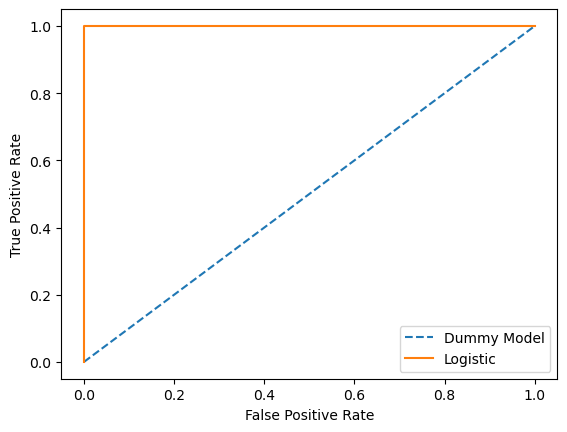

In [14]:
from matplotlib import pyplot

pyplot.plot(dummy_fpr, dummy_tpr, linestyle='--', label="Dummy Model")
pyplot.plot(model_fpr, model_tpr, linestyle='-', label="Logistic")

# axis labels
pyplot.xlabel("False Positive Rate")
pyplot.ylabel("True Positive Rate")

# show legend
pyplot.legend()

# show plot
pyplot.show()
